## The Model

### Importing the required libraries

In [2]:
#importing stuff
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# plot styles and other settings
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 60)


# Dataset and preprocessing
For this project, we are using the dataset on used car sales from all
over the India.The features available in this dataset are **Mileage, Make, Model, Year, kms travelled,transmisson, fuel type and City.**

In [3]:
#specifying the excel file to be used
excel_file="Data_Train (1).xlsx"
cars = pd.read_excel(excel_file)

In [4]:
cars.shape

(6019, 12)

In [5]:
cars.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

### Renaming columns for ease of use

In [6]:
#Setting all columns to lower case
cars.columns = [x.lower() for x in cars.columns]
cars=cars.rename(columns={"location": "city","kilometers_driven":"kms","fuel_type":"fuel",
                    "owner_type":"owner",})

### Making two new columns for "brand"(make) and model respectively

In [7]:
a1=[]
a2=[]
for s in cars["name"]:
    ary=s.split(' ')
    a1.append(ary[0])
    a2.append(ary[1])    

In [8]:
brand=pd.Series(a1)
model=pd.Series(a2)

In [9]:
brand.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Ambassador          1
Isuzu               1
Bentley             1
Smart               1
dtype: int64

In [10]:
model.value_counts()

Swift      353
City       270
i20        247
Verna      170
Innova     164
          ... 
Clubman      1
Fortwo       1
1000         1
Tiguan       1
MUX          1
Length: 212, dtype: int64

In [11]:
cars["brand"]=brand
cars["model"]=model
cars.loc[cars["brand"]=="Land","brand"]="Land_Rover"
cars.loc[cars["brand"]=="Isuzu","brand"]="ISUZU"

In [12]:
len(model.value_counts())

212

In [13]:
type(brand)

pandas.core.series.Series

In [14]:
arr=list(brand.unique())

In [15]:
arr.remove("Isuzu")

In [16]:
print(arr)

['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota', 'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault', 'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Smart', 'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini']


In [17]:
arr2=list(model.unique())

In [18]:
print(arr2)

['Wagon', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra', 'Innova', 'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover', 'Pajero', 'Amaze', 'Duster', 'New', '3', 'S', 'A6', 'i20', 'Alto', 'WRV', 'Corolla', 'Ssangyong', 'Vitara', 'KUV', 'M-Class', 'Polo', 'Nano', 'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10', 'X-Trail', 'Zen', 'Figo', 'C-Class', 'Cayenne', 'XUV500', 'Terrano', 'Brio', 'Fiesta', 'Santro', 'Zest', 'Ritz', '5', 'Fortuner', 'Ecosport', 'Verna', 'GO', 'Omni', 'Etios', 'XF', 'Eeco', 'Civic', 'V40', 'B', 'Scorpio', 'CR-V', 'SLC', '1', 'Beat', 'Rapid', 'RS5', 'Superb', 'X5', 'GLC', 'Countryman', 'Optra', 'Lodgy', 'E-Class', 'Baleno', 'Laura', 'NuvoSport', 'Fabia', 'Indigo', 'Q3', 'Octavia', 'A8', 'Verito', 'Cooper', 'Santa', 'X1', 'Accent', 'Tucson', 'GLE', 'A-Star', 'Grande', 'X3', 'EcoSport', 'Q7', 'Jetta', 'GLA', 'Celerio', 'Sumo', 'Accord', '6', 'Manza', 'Spark', 'Clubman', 'Teana', '800', 'BRV', 'XE', 'Xenon', 'A3', 'GL-Class', 'BR-V', 'S80', 'Captur', 'Enjoy', 'Bole

In [19]:
info={}
for i in range(len(cars)):
    brand_curr=cars["brand"][i]
    model_curr=cars["model"][i]
    info[model_curr]=brand_curr

In [20]:
info

{'Wagon': 'Maruti',
 'Creta': 'Hyundai',
 'Jazz': 'Honda',
 'Ertiga': 'Maruti',
 'A4': 'Audi',
 'EON': 'Hyundai',
 'Micra': 'Nissan',
 'Innova': 'Toyota',
 'Vento': 'Volkswagen',
 'Indica': 'Tata',
 'Ciaz': 'Maruti',
 'City': 'Honda',
 'Swift': 'Maruti',
 'Rover': 'Land_Rover',
 'Pajero': 'Mitsubishi',
 'Amaze': 'Honda',
 'Duster': 'Renault',
 'New': 'Tata',
 '3': 'BMW',
 'S': 'Mercedes-Benz',
 'A6': 'Audi',
 'i20': 'Hyundai',
 'Alto': 'Maruti',
 'WRV': 'Honda',
 'Corolla': 'Toyota',
 'Ssangyong': 'Mahindra',
 'Vitara': 'Maruti',
 'KUV': 'Mahindra',
 'M-Class': 'Mercedes-Benz',
 'Polo': 'Volkswagen',
 'Nano': 'Tata',
 'Elantra': 'Hyundai',
 'Xcent': 'Hyundai',
 'Thar': 'Mahindra',
 'Grand': 'Hyundai',
 'KWID': 'Renault',
 'i10': 'Hyundai',
 'X-Trail': 'Nissan',
 'Zen': 'Maruti',
 'Figo': 'Ford',
 'C-Class': 'Mercedes-Benz',
 'Cayenne': 'Porsche',
 'XUV500': 'Mahindra',
 'Terrano': 'Nissan',
 'Brio': 'Honda',
 'Fiesta': 'Ford',
 'Santro': 'Hyundai',
 'Zest': 'Tata',
 'Ritz': 'Maruti',
 

In [21]:
len(info)

212

In [22]:
cars.columns

Index(['name', 'city', 'year', 'kms', 'fuel', 'transmission', 'owner',
       'mileage', 'engine', 'power', 'seats', 'price', 'brand', 'model'],
      dtype='object')

In [23]:
cars['fuel'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [24]:
cars['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
cars['owner'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [26]:
cars['fuel'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [27]:
cars['fuel'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

> ***The next order of business was to find out the NULL values and the outliers and to deal with them.***

In [80]:
cars.isnull().sum()

name             0
city             0
year             0
kms              0
fuel             0
transmission     0
owner            0
mileage          2
engine          36
power           36
seats           42
price            0
brand            0
model            0
dtype: int64

> **The number of cars for whom specific data is missing is not too high. Infact, manual plugging of these values was possible in a reasonable amount of time. Hence, we tried to fill the data. Most of this data was derived from ["CarDekho.com"](www.cardekho.com)**

###### Displaying rows which have even a single null value

In [81]:
cars[cars.isnull().any(axis=1)].head()

,name,city,year,kms,fuel,transmission,owner,mileage,engine,power,seats,price,brand,model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,Honda,City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,Maruti,Swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60,Ford,Figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50,Land_Rover,Rover


___

# Preprocessing of the data
In order to get a better understanding of the data, we plotted some curves to understand the importance of the parameters.
We noticed that the dataset had several missing values and some outliers as well, primarily due to large price sensitivity of used cars. **Generally, the "mechanical health" of a car is not only dependent on the technical specs, but also on how the car has been maintained by the previous owners. Also, accident history and condition can have a significant effect on the
car’s price.** Since we did not have access to vehicle history and condition(these generally being non-quantifiable characteristics), we had to do with the available parameters.

## Dealing with anomalous values in "engine" column

In [82]:
len(cars[cars['engine'].isnull()])

36

In [83]:
cars[cars['engine'].isnull()].head()

,name,city,year,kms,fuel,transmission,owner,mileage,engine,power,seats,price,brand,model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,Honda,City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,Maruti,Swift
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50,Land_Rover,Rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20,Honda,City


##### Manual handling of null values ( data derived from cardekho.com)

In [84]:
#cars.loc[(cars['model'] == 'New') & (cars['brand'] == 'Mercedes-Benz'), 'model'] = 'C-Class'
#cars[cars['engine'].isnull()].loc[cars["model"]=="Swift","engine"]=1300
le=cars["engine"].isnull()
#print(le)
for i in range(len(cars)):
    if le[i]==True:
        if cars["model"][i]=="Swift":
            cars.loc[i,"engine"]=1300
        if cars["model"][i]=="City":
            cars.loc[i,"engine"]=1500
        if cars["model"][i]=="Punto":
            cars.loc[i,"engine"]=1300
        if cars["model"][i]=="5":
            cars.loc[i,"engine"]=2000
        if cars["model"][i]=="Rover":
            cars.loc[i,"engine"]=3000
        if cars["model"][i]=="Santro":
            cars.loc[i,"engine"]=1086
        if cars["model"][i]=="Etios":
            cars.loc[i,"engine"]=1197
        if cars["model"][i]=="Wagon" or cars["model"][i]=="Wagon-R":
            cars.loc[i,"engine"]=998
        if cars["model"][i]=="CR-V":
            cars.loc[i,"engine"]=2354
        if cars["model"][i]=="Jazz":
            cars.loc[i,"engine"]=1198

In [85]:
for i in range(len(cars)):
    st=cars.loc[i,"engine"]
    #print(i)
    a=4
    b=2.0
    if type(st)!=type(a) and type(st)!=type(b):
    #print(st)
    #st=str(st)
        le=""
        for j in st:
            if j==' ':
                break
            le=le+j
        cars.loc[i,"engine"]=le

In [86]:
cars["engine"]=pd.to_numeric(cars["engine"])

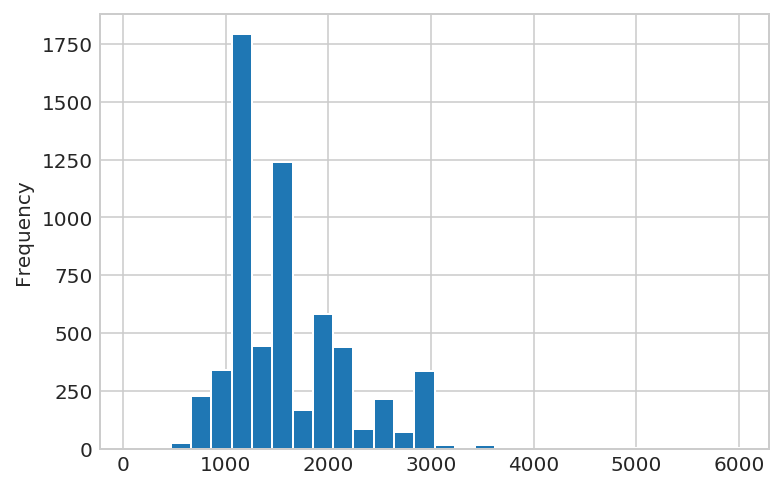

In [87]:
cars['engine'].plot(kind='hist',bins=30)
plt.show()

In [88]:
len(cars[cars['engine'].isnull()])

0

___

## Dealing with anomalous values in "mileage" column

In [89]:
len(cars[cars['mileage'].isnull()])

2

In [90]:
cars[cars['mileage'].isnull()]

,name,city,year,kms,fuel,transmission,owner,mileage,engine,power,seats,price,brand,model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72,41 bhp,5.0,13.00,Mahindra,E
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798,73 bhp,5.0,12.75,Toyota,Prius


In [91]:
cars.loc[cars["model"]=="Prius","mileage"]=24
cars.loc[cars["model"]=="E","mileage"]=30

In [92]:
for i in range(len(cars)):
    st=cars.loc[i,"mileage"]
    #print(i)
    a=4
    if type(st)!=type(a):
    #print(st)
    #st=str(st)
        le=""
        for j in st:
            if j==' ':
                break
            le=le+j
        cars.loc[i,"mileage"]=le

In [93]:
cars["mileage"]=pd.to_numeric(cars["mileage"])

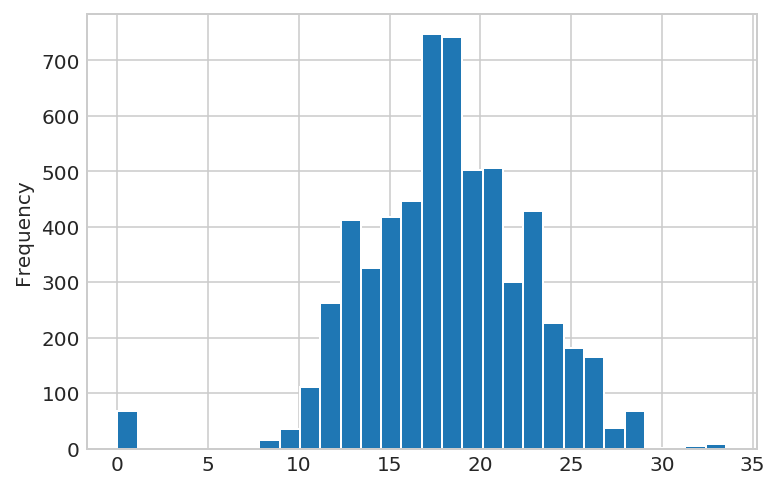

In [94]:
cars['mileage'].plot(kind='hist',bins=30)
plt.show()

In [95]:
len(cars[cars['mileage'].isnull()])

0

### Dealing with cars which are supposed to have zero mileage ( which obviously signifies faulty data collection)

In [96]:
cars[cars["mileage"]<5]

,name,city,year,kms,fuel,transmission,owner,mileage,engine,power,seats,price,brand,model
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179,115 bhp,5.0,17.50,Land_Rover,Rover
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950,194 bhp,5.0,35.67,Mercedes-Benz,C-Class
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null bhp,5.0,1.30,Hyundai,Santro
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1500,NaN,NaN,2.95,Honda,City
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498,99 bhp,NaN,3.60,Ford,Figo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446,null bhp,8.0,2.20,Toyota,Qualis
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950,194 bhp,5.0,35.00,Mercedes-Benz,C-Class
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112,null bhp,6.0,1.70,Mahindra,Jeep
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086,62 bhp,5.0,1.39,Hyundai,Santro


In [97]:
#cars.loc[(cars['model'] == 'New') & (cars['brand'] == 'Mercedes-Benz'), 'model'] = 'C-Class'
#cars[cars['engine'].isnull()].loc[cars["model"]=="Swift","engine"]=1300
#print(le)
col_name="mileage"
cars.loc[i,col_name]
for i in range(len(cars)):
    if cars[col_name][i]==0:
        if cars["model"][i]=="Santro":
            cars.loc[i,col_name]=17
        elif cars["model"][i]=="Jeep":
            cars.loc[i,col_name]=12
        elif cars["model"][i]=="Qualis":
            cars.loc[i,col_name]=13.1
        elif cars["model"][i]=="Jetta":
            cars.loc[i,col_name]=17
        elif cars["model"][i]=="Qualis":
            cars.loc[i,col_name]=13.1
        elif cars["model"][i]=="C-Class":
            cars.loc[i,col_name]=15.07
        elif cars["model"][i]=="Superb":
            cars.loc[i,col_name]=13.9
        elif cars["model"][i]=="M-Class":
            cars.loc[i,col_name]=11.74
        elif cars["model"][i]=="Rover":
            cars.loc[i,col_name]=12.70
        elif cars["model"][i]=="City":
            if cars["fuel"][i]=="Petrol":
                cars.loc[i,col_name]=16.72
            else:
                cars.loc[i,col_name]=25.68
        elif cars["model"][i]=="Figo":
            cars.loc[i,col_name]=20.8
        elif cars["model"][i]=="A7":
            cars.loc[i,col_name]=14.4
        elif cars["model"][i]=="Baleno":
            cars.loc[i,col_name]=21.4
        elif cars["model"][i]=="A7":
            cars.loc[i,col_name]=14.4
        elif cars["model"][i]=="Siena":
            cars.loc[i,col_name]=12
        elif cars["model"][i]=="Fortwo":
            cars.loc[i,col_name]=55*0.43
        #cars[col_name][i]=str(cars[col_name][i])

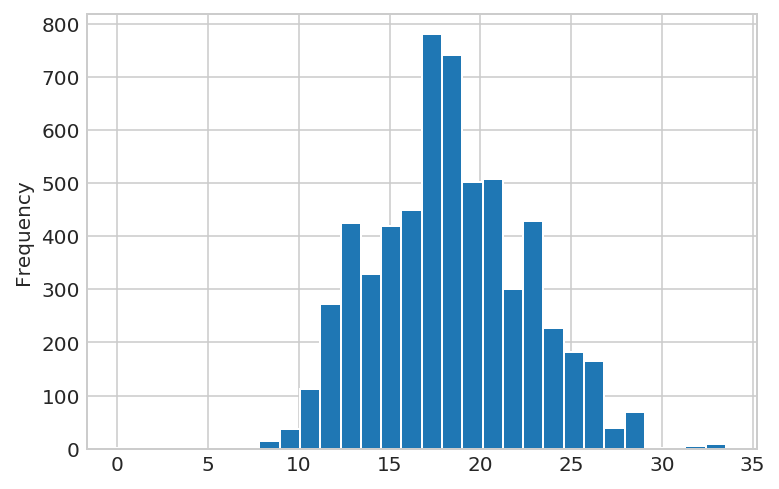

In [98]:
cars['mileage'].plot(kind='hist',bins=30)
plt.show()

___

## Dealing with "seats" column

In [99]:
len(cars[cars['seats'].isnull()])

42

In [100]:
cars[cars['seats'].isnull()].head()

,name,city,year,kms,fuel,transmission,owner,mileage,engine,power,seats,price,brand,model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,16.72,1500,NaN,NaN,2.95,Honda,City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1300,NaN,NaN,2.11,Maruti,Swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,20.80,1498,99 bhp,NaN,3.60,Ford,Figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,1300,NaN,NaN,1.75,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,12.70,3000,NaN,NaN,26.50,Land_Rover,Rover


In [101]:
five=["Santro","Punto","Swift","City","Jazz","Estilo","Etios","Figo","Wagon-R","5","Rover","CR-V"]

### Manual handling of null values ( data derived from cardekho.com)

In [102]:
#cars.loc[(cars['model'] == 'New') & (cars['brand'] == 'Mercedes-Benz'), 'model'] = 'C-Class'
#cars[cars['engine'].isnull()].loc[cars["model"]=="Swift","engine"]=1300
le=cars["seats"].isnull()
#print(le)
col_name="seats"
for i in range(len(cars)):
    if le[i]==True:
        if cars["model"][i]in five:
            cars.loc[i,"seats"]=5
        else:
            cars.loc[i,"seats"]=7

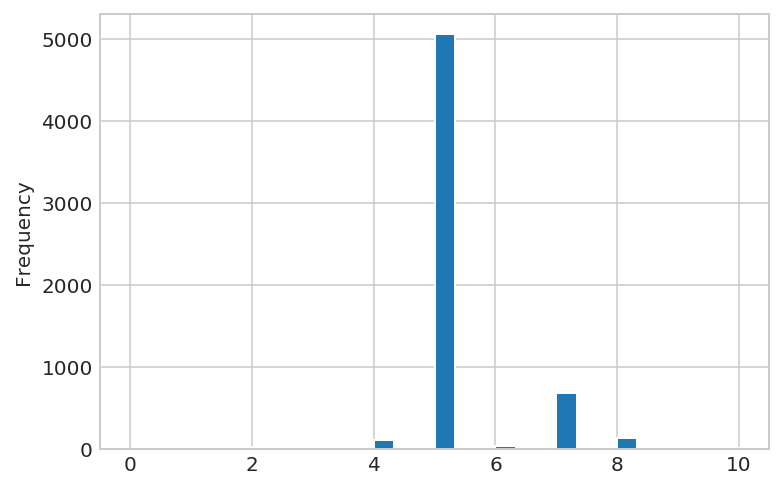

In [103]:
cars['seats'].plot(kind='hist',bins=30)
plt.show()

In [104]:
len(cars[cars['seats'].isnull()])

0

# -------------------------------------------------------------------------------------------------------------

# Dealing with "power" column

In [105]:
len(cars[cars['power'].isnull()])

36

In [106]:
cars[cars['power'].isnull()]

,name,city,year,kms,fuel,transmission,owner,mileage,engine,power,seats,price,brand,model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,16.72,1500,NaN,5.0,2.95,Honda,City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1300,NaN,5.0,2.11,Maruti,Swift
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,1300,NaN,5.0,1.75,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,12.70,3000,NaN,5.0,26.50,Land_Rover,Rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,1500,NaN,5.0,3.20,Honda,City
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1300,NaN,5.0,5.80,Maruti,Swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,16.72,1500,NaN,5.0,1.50,Honda,City
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,12.70,3000,NaN,5.0,40.88,Land_Rover,Rover
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,1300,NaN,5.0,3.15,Maruti,Swift
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,17.00,1086,NaN,5.0,1.93,Hyundai,Santro


## Manual handling of null values ( data derived from cardekho.com)

In [107]:
#cars.loc[(cars['model'] == 'New') & (cars['brand'] == 'Mercedes-Benz'), 'model'] = 'C-Class'
#cars[cars['engine'].isnull()].loc[cars["model"]=="Swift","engine"]=1300
le=cars["power"].isnull()
#print(le)
col_name="power"
cars.loc[76,col_name]=67
cars.loc[79,col_name]=62

for i in range(len(cars)):
    if le[i]==True or cars.loc[i,"power"]=='null':
        if cars["model"][i]=="Swift":
            cars.loc[i,col_name]=75
        elif cars["model"][i]=="City":
            if cars["fuel"][i]=="Petrol":
                cars.loc[i,col_name]=117.3
            else:
                cars.loc[i,col_name]=98.6
        elif cars["model"][i]=="Santro":
            cars.loc[i,col_name]=62          
        elif cars["model"][i]=="Jazz":
            if cars["fuel"][i]=="Petrol":
                cars.loc[i,col_name]=88.7
            else:
                cars[col_name][i]=98.6
        elif cars["model"][i]=="Punto":
            cars.loc[i,col_name]=67
        elif cars["model"][i]=="5":
            cars.loc[i,col_name]=200
        elif cars["model"][i]=="Etios":
            cars.loc[i,col_name]=78.9
        elif cars["model"][i]=="Wagon-R" or cars["model"][i]=='Wagon':
            cars.loc[i,col_name]=67.1
        elif cars["model"][i]=="CR-V":
            cars.loc[i,col_name]=152
        elif cars["name"][i]=="Land Rover Range Rover 3.0 D":
            cars.loc[i,col_name]=255
        elif cars["model"][i]=="Rover":
            cars.loc[i,col_name]=503
        elif cars["model"][i]=="Estilo":
            cars.loc[i,col_name]=68
        elif cars["model"][i]=="Qualis":
            cars.loc[i,col_name]=75
        elif cars["model"][i]=="E-Class":
            cars.loc[i,col_name]=192
        elif cars["model"][i]=="Esteem":
            cars.loc[i,col_name]=85
        elif cars["model"][i]=="Indica":
            cars.loc[i,col_name]=69
        elif cars["model"][i]=="Jeep":
            cars.loc[i,col_name]=62
        elif cars["model"][i]=="Petra":
            cars.loc[i,col_name]=72
        elif cars["model"][i]=="100":
            cars.loc[i,col_name]=37
        elif cars["model"][i]=="Cayman":
            cars.loc[i,col_name]=320
        elif cars["model"][i]=="Laura":
            cars.loc[i,col_name]=160
        elif cars["model"][i]=="Optra":
            cars.loc[i,col_name]=110
        elif cars["model"][i]=="A4":
            cars.loc[i,col_name]=265
        elif cars["model"][i]=="Jetta":
            cars.loc[i,col_name]=105
        elif cars["model"][i]=="Micra":
            cars.loc[i,col_name]=63.1
        elif cars["model"][i]=="1000":
            cars.loc[i,col_name]=32
        elif cars["model"][i]=="Bolero":
            cars.loc[i,col_name]=63
        elif cars["model"][i]=="Siena":
            cars.loc[i,col_name]=45
        elif cars["model"][i]=="Teana":
            cars.loc[i,col_name]=179.5
        elif cars["name"][i]=="Ford Endeavour Hurricane LE":
            cars.loc[i,col_name]=156
        elif cars["model"][i]=="Endeavour":
            cars.loc[i,col_name]=141
        elif cars["model"][i]=="Fortwo":
            cars.loc[i,col_name]=85
        else:
            cars.loc[i,col_name]=80

In [108]:
col_name="power"
for i in range(len(cars)):
    st=cars["power"][i]
    a=4.1
    b=3
    if type(st)!=type(a) and type(st)!=type(b):
        le=""
        for j in st:
            if j==' ':
                break
            le=le+j
        cars.loc[i,col_name]=le

In [109]:
#cars.loc[(cars['model'] == 'New') & (cars['brand'] == 'Mercedes-Benz'), 'model'] = 'C-Class'
#cars[cars['engine'].isnull()].loc[cars["model"]=="Swift","engine"]=1300
le=cars["power"].isnull()
#print(le)
col_name="power"
cars.loc[76,col_name]=67
cars.loc[79,col_name]=62

for i in range(len(cars)):
    if le[i]==True or cars.loc[i,"power"]=='null':
        if cars["model"][i]=="Swift":
            cars.loc[i,col_name]=75
        elif cars["model"][i]=="City":
            if cars["fuel"][i]=="Petrol":
                cars.loc[i,col_name]=117.3
            else:
                cars.loc[i,col_name]=98.6
        elif cars["model"][i]=="Santro":
            cars.loc[i,col_name]=62          
        elif cars["model"][i]=="Jazz":
            if cars["fuel"][i]=="Petrol":
                cars.loc[i,col_name]=88.7
            else:
                cars[col_name][i]=98.6
        elif cars["model"][i]=="Punto":
            cars.loc[i,col_name]=67
        elif cars["model"][i]=="5":
            cars.loc[i,col_name]=200
        elif cars["model"][i]=="Etios":
            cars.loc[i,col_name]=78.9
        elif cars["model"][i]=="Wagon-R" or cars["model"][i]=='Wagon':
            cars.loc[i,col_name]=67.1
        elif cars["model"][i]=="CR-V":
            cars.loc[i,col_name]=152
        elif cars["name"][i]=="Land Rover Range Rover 3.0 D":
            cars.loc[i,col_name]=255
        elif cars["model"][i]=="Rover":
            cars.loc[i,col_name]=503
        elif cars["model"][i]=="Estilo":
            cars.loc[i,col_name]=68
        elif cars["model"][i]=="Qualis":
            cars.loc[i,col_name]=75
        elif cars["model"][i]=="E-Class":
            cars.loc[i,col_name]=192
        elif cars["model"][i]=="Esteem":
            cars.loc[i,col_name]=85
        elif cars["model"][i]=="Indica":
            cars.loc[i,col_name]=69
        elif cars["model"][i]=="Jeep":
            cars.loc[i,col_name]=62
        elif cars["model"][i]=="Petra":
            cars.loc[i,col_name]=72
        elif cars["model"][i]=="100":
            cars.loc[i,col_name]=37
        elif cars["model"][i]=="Cayman":
            cars.loc[i,col_name]=320
        elif cars["model"][i]=="Laura":
            cars.loc[i,col_name]=160
        elif cars["model"][i]=="Optra":
            cars.loc[i,col_name]=110
        elif cars["model"][i]=="A4":
            cars.loc[i,col_name]=265
        elif cars["model"][i]=="Jetta":
            cars.loc[i,col_name]=105
        elif cars["model"][i]=="Micra":
            cars.loc[i,col_name]=63.1
        elif cars["model"][i]=="1000":
            cars.loc[i,col_name]=32
        elif cars["model"][i]=="Bolero":
            cars.loc[i,col_name]=63
        elif cars["model"][i]=="Siena":
            cars.loc[i,col_name]=45
        elif cars["model"][i]=="Teana":
            cars.loc[i,col_name]=179.5
        elif cars["name"][i]=="Ford Endeavour Hurricane LE":
            cars.loc[i,col_name]=156
        elif cars["model"][i]=="Endeavour":
            cars.loc[i,col_name]=141
        elif cars["model"][i]=="Fortwo":
            cars.loc[i,col_name]=85
        else:
            cars.loc[i,col_name]=80
            
col_name="power"
for i in range(len(cars)):
    st=cars["power"][i]
    a=4.1
    b=3
    if type(st)!=type(a) and type(st)!=type(b):
        le=""
        for j in st:
            if j==' ':
                break
            le=le+j
        cars.loc[i,col_name]=le

In [110]:
cars["power"]=pd.to_numeric(cars["power"])

## There seems to be a high correlation between engine and power
Hence, it seems fair to drop one of the columns ( let's say the power column). Even though it analytically does not seem to matter to the Random Forest Algorithm whether two columns are correlated or not, we will drop the "power: column anyway for sake of simplicity.

In [111]:
cars.corr()

,year,kms,mileage,engine,power,seats,price
year,1.000000,-0.173048,0.295254,-0.050621,0.031420,0.013465,0.305327
kms,-0.173048,1.000000,-0.064611,0.090577,0.030449,0.083675,-0.011493
mileage,0.295254,-0.064611,1.000000,-0.643276,-0.544305,-0.340743,-0.336008
engine,-0.050621,0.090577,-0.643276,1.000000,0.864576,0.392469,0.659314
power,0.031420,0.030449,-0.544305,0.864576,1.000000,0.092668,0.772950
seats,0.013465,0.083675,-0.340743,0.392469,0.092668,1.000000,0.052358
price,0.305327,-0.011493,-0.336008,0.659314,0.772950,0.052358,1.000000


In [112]:
cars.to_excel("ideal.xlsx") 

---

## Viewing the unique value of all the columns along with frequency count

In [113]:
for i in cars.columns:
    print("Number of unique values for {} is {}".format(i,len(cars[i].unique())))

Number of unique values for name is 1876
Number of unique values for city is 11
Number of unique values for year is 22
Number of unique values for kms is 3093
Number of unique values for fuel is 5
Number of unique values for transmission is 2
Number of unique values for owner is 4
Number of unique values for mileage is 434
Number of unique values for engine is 150
Number of unique values for power is 372
Number of unique values for seats is 9
Number of unique values for price is 1373
Number of unique values for brand is 30
Number of unique values for model is 212


# ---------------------------------------------------------------------------------------------------------

# Random Forest
Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [114]:
cars2=cars.copy()

# columns to be dropped
master_list=['name','power','mileage','city']
cars2=cars2.drop(master_list, axis=1)

### One-Hot Vectorization
We converted the categorical data into one-hot vectors. 

In [115]:
cars2=pd.get_dummies(cars2)

In [116]:
col_now=list(cars2.columns)
col_now.remove("price")
train_cols=col_now

In [117]:
from sklearn.model_selection import train_test_split
X = cars2[col_now]
y = cars2['price']

# split into train and test sets
'''Since this is the training set and the testing set is being explicitly exported below,
so for checking purposes, the initial training set is being reduced to just 0.0005 of the original size'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0005, random_state=36062)

In [118]:
X_test.loc[:]

,year,kms,engine,seats,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Automatic,...,model_Xcent,model_Xenon,model_Xylo,model_Yeti,model_Z4,model_Zen,model_Zest,model_i10,model_i20,model_redi-GO
1073,2013,67443,1248,7.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2268,2013,25984,1499,5.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1159,2018,50234,1197,5.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
952,2018,92056,2393,7.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
print(X_test.shape)

(4, 257)


In [121]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=32321)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [122]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6224249999999945
Mean Squared Error: 0.4223219624999923
Root Mean Squared Error: 0.6498630336463156


In [123]:
from sklearn.metrics import r2_score
#y_train=np.array([[1],[2],[3]])
#y_pred=y_train
coeff = r2_score(y_test, y_pred)
print(coeff)

0.9869243183265982


In [124]:
y_test=np.array([y_test])

In [125]:
pd.set_option('display.max_rows',60)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,5.75,5.2116
1,5.35,5.7198
2,4.77,5.6385
3,18.39,17.6770


## Dealing with the data of the test.xlsx for which values are to be predicted

In [126]:
#specifying the excel file to be used
excel_file2="Data_Test (1).xlsx"

'''Here, the read_excel method read the data from the Excel file into a pandas Data
Frame object. Pandas defaults to storing data in DataFrames'''
cars3 = pd.read_excel(excel_file2)

In [127]:
def preprocess(cars):
    cars.columns = [x.lower() for x in cars.columns]
    cars=cars.rename(columns={"location": "city","kilometers_driven":"kms","fuel_type":"fuel",
                    "owner_type":"owner",})
    a1=[]
    a2=[]
    for s in cars["name"]:
        ary=s.split(' ')
        a1.append(ary[0])
        a2.append(ary[1])
    brand=pd.Series(a1)
    model=pd.Series(a2)
    cars["brand"]=brand
    cars["model"]=model
    cars.loc[cars["brand"]=="Land","brand"]="Land_Rover"
    cars["seats"]=cars["seats"].fillna(5) 
    
    le=cars["engine"].isnull()
    for i in range(len(cars)):
        if le[i]==True:
            if cars["model"][i]=="Swift":
                cars.loc[i,"engine"]=1300
            if cars["model"][i]=="City":
                cars.loc[i,"engine"]=1500
            if cars["model"][i]=="Punto":
                cars.loc[i,"engine"]=1300
            if cars["model"][i]=="5":
                cars.loc[i,"engine"]=2000
            if cars["model"][i]=="Rover":
                cars.loc[i,"engine"]=3000
            if cars["model"][i]=="Santro":
                cars.loc[i,"engine"]=1086
            if cars["model"][i]=="Etios":
                cars.loc[i,"engine"]=1197
            if cars["model"][i]=="Wagon" or cars["model"][i]=="Wagon-R":
                cars.loc[i,"engine"]=998
            if cars["model"][i]=="CR-V":
                cars.loc[i,"engine"]=2354
            if cars["model"][i]=="Jazz":
                cars.loc[i,"engine"]=1198
            if cars["model"][i]=="Laura":
                cars.loc[i,"engine"]=1896
            if cars["model"][i]=="TUV":
                cars.loc[i,"engine"]=2179
            if cars["model"][i]=="i20":
                cars.loc[i,"engine"]=1399
        
    for i in range(len(cars)):
        st=cars["engine"][i]
        a=4
        b=2.0
        #c=2.0000000000000000000000
        #print(type(c))
        if type(st)!=type(a) and type(st)!=type(b) and type(st)!=type(np.float64(b)):
            le=""
            for j in st:
                if j==' ':
                    break
                le=le+j
            cars.loc[i,"engine"]=le

    cars["engine"]=pd.to_numeric(cars["engine"])
    return cars

In [128]:
cars3.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [129]:
cars3=preprocess(cars3)

In [130]:
cars3.shape

(1234, 13)

In [131]:
type(cars.iloc[1])

pandas.core.series.Series

In [132]:
cars.iloc[1]

name            Hyundai Creta 1.6 CRDi SX Option
city                                        Pune
year                                        2015
kms                                        41000
fuel                                      Diesel
transmission                              Manual
owner                                      First
mileage                                    19.67
engine                                      1582
power                                      126.2
seats                                          5
price                                       12.5
brand                                    Hyundai
model                                      Creta
Name: 1, dtype: object

In [133]:
cars3[cars3['engine'].isnull()]

,name,city,year,kms,fuel,transmission,owner,mileage,engine,power,seats,brand,model


___

In [134]:
X_test2=[]
y_test2=[]

In [135]:
def predict_values(cars):
    #local cars2
    #cars3.head()
    print(type(cars))
    cars2=cars.copy()    
    #print(cars2.columns)
    cars2=cars2.drop(master_list, axis=1)
    cars2=pd.get_dummies(cars2)
    test_cols=list(cars2.columns)
    type(test_cols)
    ######################################################################
    
    missing_cols = set( train_cols ) - set( test_cols )
    missing_cols2=set(test_cols)-set(train_cols)
    print(missing_cols)
    print(missing_cols2)
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        cars2[c] = 0
    # Ensure the order of column in the test set is in the same order than in train set
    cars2 =cars2[train_cols]
    #########################################################################
    X = cars2[train_cols]
    #y = cars2['price']
    print(X.shape)
    
    global sc
    global X_test2
    X_test = sc.transform(X)
    y_pred = regressor.predict(X_test)
    X_test2=X_test
    print(type(y_pred))
    new_series = pd.Series(y_pred)
    cars['Random_Forest_price']=new_series
    return cars

In [136]:
cars4=predict_values(cars3)

<class 'pandas.core.frame.DataFrame'>
{'model_Fluence', 'model_S-Cross', 'model_1', 'brand_Ambassador', 'model_Nexon', 'model_R-Class', 'model_Lancer', 'model_Fusion', 'model_A7', 'model_SLK-Class', 'model_Estilo', 'model_Fabia', 'model_Venture', 'model_XUV300', 'model_X-Trail', 'model_1000', 'model_Hexa', 'model_Petra', 'model_XJ', 'model_Logan', 'model_Tiguan', 'model_Prius', 'model_Countryman', 'fuel_Electric', 'model_Gallardo', 'model_WR-V', 'model_Beetle', 'model_Platinum', 'model_F', 'model_Redi', 'model_Mustang', 'model_NuvoSport', 'model_TT', 'model_MUX', 'brand_Lamborghini', 'model_C-Class', 'model_RS5', 'model_Safari', 'brand_Force', 'model_S-Class', 'model_Cayman', 'model_Montero', 'model_Evalia', 'model_Outlander', 'model_Aspire', 'model_Continental', 'model_E', 'model_Yeti', 'model_Boxster', 'model_One', 'model_GLS', 'model_SL-Class', 'model_Jeep', 'model_Bolt', 'model_Scala', 'model_Siena', 'model_Z4', 'model_Panamera', 'brand_Smart', 'model_Cedia', 'model_Santa', 'model_

In [74]:
'''y_exp=[]
y_got=[]
cnt=0
for i in range(len(cars4)):
    ans=2.0
    model_a=cars4["model"][i]
    year_a=cars4['year'][i]
    df=cars.loc[((cars['model'] ==model_a) & (abs(cars['year']-year_a) < 4))]
    if len(df)>0:
        ans=df['price'].mean()
    else:
        cnt+=1
    y_exp.append(ans);
print(cnt)'''

'y_exp=[]\ny_got=[]\ncnt=0\nfor i in range(len(cars4)):\n    ans=2.0\n    model_a=cars4["model"][i]\n    year_a=cars4[\'year\'][i]\n    df=cars.loc[((cars[\'model\'] ==model_a) & (abs(cars[\'year\']-year_a) < 4))]\n    if len(df)>0:\n        ans=df[\'price\'].mean()\n    else:\n        cnt+=1\n    y_exp.append(ans);\nprint(cnt)'

In [75]:
y_given=np.array(cars4['Random_Forest_price'])
len(y_given)
y_test2=y_given

In [76]:
y_given=pd.Series(y_given)
y_given.fillna(y_given.median())
y_given=np.array(y_given)

In [77]:
#coeff2 = r2_score(y_exp, y_given)
#print(coeff2)

In [78]:
np.any(np.isnan(y_given))

False

In [79]:
X_test2

array([[ 0.19673776, -0.1950855 , -1.03605015, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [-0.1091236 , -0.04650321, -1.37209364, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [ 1.11432184, -0.27098691,  1.28464622, ..., -0.16317385,
        -0.20693591, -0.03159909],
       ...,
       [-0.41498497, -0.3367119 , -0.26581186, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [-0.1091236 , -0.07094195, -0.70499741, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [ 0.19673776,  0.15012405,  0.87706872, ..., -0.16317385,
        -0.20693591, -0.03159909]])

In [80]:
np.all(np.isfinite(y_given))

True

In [81]:
#new_series = pd.Series(y_exp)
#cars4['exp_price']=new_series

In [82]:
cars4.loc[:]

,name,city,year,kms,fuel,transmission,owner,mileage,engine,power,seats,brand,model,Random_Forest_price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998,58.2 bhp,4.0,Maruti,Alto,3.0924
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796,47.3 bhp,5.0,Maruti,Alto,2.2491
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393,147.8 bhp,7.0,Toyota,Innova,17.3616
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364,null bhp,5.0,Toyota,Etios,3.7711
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197,82.85 bhp,5.0,Hyundai,i20,5.2811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598,103.6 bhp,5.0,Volkswagen,Vento,3.8430
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197,103.6 bhp,5.0,Volkswagen,Polo,6.4333
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461,63.1 bhp,5.0,Nissan,Micra,3.1566
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197,103.6 bhp,5.0,Volkswagen,Polo,4.1258


In [83]:
'''fig, ax = plt.subplots()
ax.scatter(y_exp,y_given)
#ax.plot([y_exp.min(), y_exp.max()], [y_exp.min(), y_exp.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()'''

"fig, ax = plt.subplots()\nax.scatter(y_exp,y_given)\n#ax.plot([y_exp.min(), y_exp.max()], [y_exp.min(), y_exp.max()], 'k--', lw=4)\nax.set_xlabel('Measured')\nax.set_ylabel('Predicted')\nplt.show()"

___


## XGBoost
The XGBoost library implements the gradient boosting decision tree algorithm.

This algorithm goes by lots of different names such as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines.

Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. 

### Hyperparameter optimisations

In [84]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [85]:
def hyperParameterTuning(x_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'eta': [0.01,0.3]
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_


In [86]:
#Run below line for double checking only, can run upto 5 mins

# hyperParameterTuning(X_train, y_train)


#the above line gives us an output of the following

# {'colsample_bytree': 0.7,
#  'learning_rate': 0.01,
#  'max_depth': 10,
#  'min_child_weight': 1,
#  'subsample': 0.7}


In [87]:
X_test

array([[-0.1091236 ,  0.09535323, -0.62015475, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [-0.1091236 , -0.35879549, -0.20259576, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [ 1.4201832 , -0.09315699, -0.70499741, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [ 1.4201832 ,  0.36496809,  1.28464622, ..., -0.16317385,
        -0.20693591, -0.03159909]])

In [88]:
y_test2 = y_test2.transpose()
y_test2.shape

(1234,)

In [89]:
X_test2

array([[ 0.19673776, -0.1950855 , -1.03605015, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [-0.1091236 , -0.04650321, -1.37209364, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [ 1.11432184, -0.27098691,  1.28464622, ..., -0.16317385,
        -0.20693591, -0.03159909],
       ...,
       [-0.41498497, -0.3367119 , -0.26581186, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [-0.1091236 , -0.07094195, -0.70499741, ..., -0.16317385,
        -0.20693591, -0.03159909],
       [ 0.19673776,  0.15012405,  0.87706872, ..., -0.16317385,
        -0.20693591, -0.03159909]])

In [90]:
#input the hyperparameters and we are done
xgb_model = XGBRegressor(
        colsample_bytree= 0.7,
        learning_rate= 0.01,
        max_depth= 10,
        min_child_weight= 1,
        n_estimators= 1000,
        subsample= 0.7)

xgb_model.fit(X_train, y_train)
predictions = xgb_model.predict(X_test2)
r2_score(predictions,y_test2)

[22:30:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9892042976229981

In [91]:
new_series = pd.Series(predictions)
cars4['XGB_price']=new_series

#pd.set_option('display.max_rows', 7000)
cars4.loc[:]
cars4.dtypes

name                    object
city                    object
year                     int64
kms                      int64
fuel                    object
transmission            object
owner                   object
mileage                 object
engine                   int64
power                   object
seats                  float64
brand                   object
model                   object
Random_Forest_price    float64
XGB_price              float32
dtype: object

# Results

In [92]:
pd.set_option('display.max_rows', 100)

In [93]:
cars4.loc[:]

,name,city,year,kms,fuel,transmission,owner,mileage,engine,power,seats,brand,model,Random_Forest_price,XGB_price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998,58.2 bhp,4.0,Maruti,Alto,3.0924,2.935872
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796,47.3 bhp,5.0,Maruti,Alto,2.2491,2.431911
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393,147.8 bhp,7.0,Toyota,Innova,17.3616,17.778378
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364,null bhp,5.0,Toyota,Etios,3.7711,3.737540
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197,82.85 bhp,5.0,Hyundai,i20,5.2811,4.667237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598,103.6 bhp,5.0,Volkswagen,Vento,3.8430,3.901878
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197,103.6 bhp,5.0,Volkswagen,Polo,6.4333,5.663555
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461,63.1 bhp,5.0,Nissan,Micra,3.1566,3.704683
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197,103.6 bhp,5.0,Volkswagen,Polo,4.1258,4.207714


In [94]:
cars4.to_excel("output.xlsx")  

# Final Conclusions
Like most data science problems, this work would have undoubtedly benefitted from cleaner (and more) data. While the details provided in the downloaded listings are quite comprehensive,some features, especially 'name',seemed to have too many variations with even the same car model having multiple sub-categories.

We utilized several classic and state-of-the-art methods, including
ensemble learning techniques, with a 90-10 split on test and training
data.



| Model             	| R2 scores for a 90-10 split on Training data 	|
|-------------------	|----------------------------------------------	|
| XgBoost           	| 0.95                                         	|
| RandomForest      	| 0.927                                        	|
| Linear Regression 	| 0.60                                         	|
| Gradient Boosting 	| 0.90                                         	|

Although the scores predicted by both **XgBoost** and **Random Forest** seem quite reasonable, ***XgBoost seems to give slightly better results than RandomForest and this is the one we use for the final model.***